# HR ANALYTICS(Classification)

1.  Intoduction
2.  Data Preprocessing
3.  Data Vizualization
4.  EDA
5.  PCA
6.  Model Testing
7.  Ensemble Tecniques
8.  GridsearchCv
9.  BestModel
10. Cross Validation
11. AUC ROC Curve
12. Saving the best Model

# Introduction

This case study aims to model the probability of attrition of each employee from the HR Analytics Dataset, available on Kaggle.
Its conclusions will allow the management to understand which factors urge the employees to leave the company and which changes
should be made to avoid their departure.

This dataset is consists of 1470 rows and 35 columns. Each row represents an employee, and each column contains one employee
attribute.None of these attributes contains any NA.

Our Objective is to understand what factors contribute most to employee turnoverandc reate a model that can predict if a
certain employee will leave the company or not.

Task: Classification
    
Target: Atrrition Column    

# Data Preprocessing

In [1]:
# imorting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading Dataset
df=pd.read_csv("hr.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
#cheking datatypes
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [4]:
#checking for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
# checking unique values in each column
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('\n') 

Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]


Attrition
['Yes' 'No']


BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']


DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  96

In [6]:
# as we saw the above columns contains same value so we drop it...as it doesnt contibute 
df.drop('EmployeeCount',axis=1,inplace=True)
df.drop('StandardHours',axis=1,inplace=True)
df.drop('EmployeeNumber',axis=1,inplace=True)
df.drop('Over18',axis=1,inplace=True)

In [7]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


# Data Vizualization

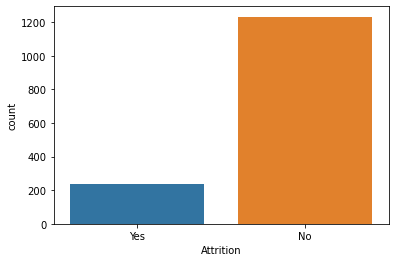

In [8]:
#Lets check the count of attrition
sns.countplot(x="Attrition",data=df)
plt.show()

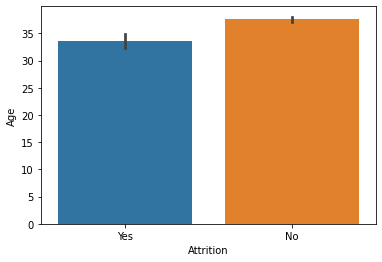

In [9]:
#Lets see average age of employees who is leaving to that who are staying
sns.barplot(x="Attrition",y="Age",data=df)
plt.show()

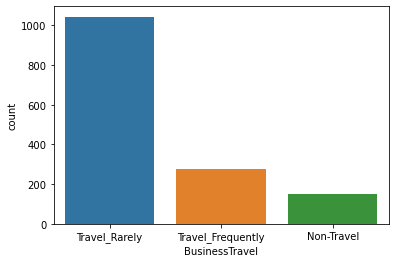

In [10]:
#Lets check the count of employees based on buisness travel
sns.countplot(x="BusinessTravel",data=df)
plt.show()

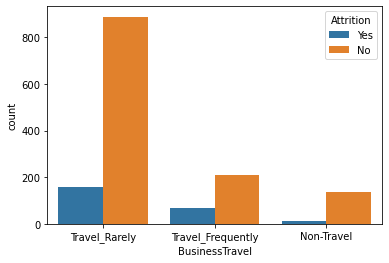

In [11]:
#Lets see the count of each category of buisness travel where employee attrition is true
sns.countplot(x="BusinessTravel",data=df,hue="Attrition")
plt.show()

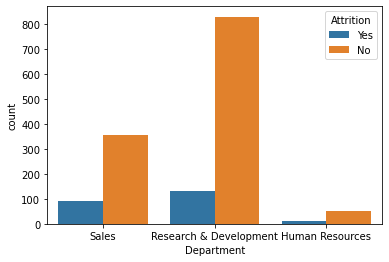

In [12]:
#lets check in which department attrintion is high
sns.countplot(x="Department",data=df,hue="Attrition")
plt.show()

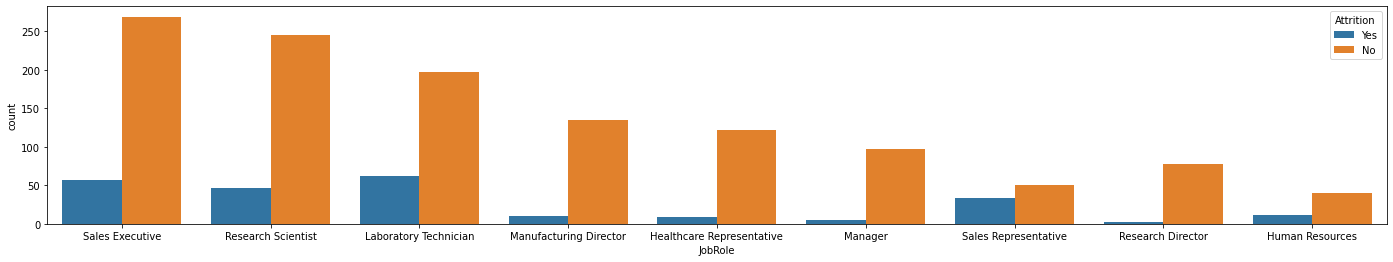

In [13]:
#Lets chcek the attrition in each job role
plt.figure(figsize=(24,4))
sns.countplot(x="JobRole",data=df,hue="Attrition")
plt.show()

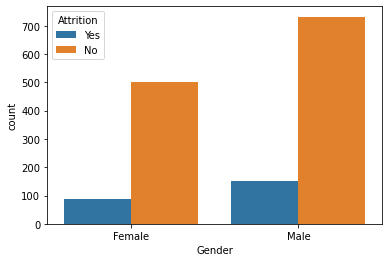

In [14]:
#lets chcek the attrition ratio based on gender
sns.countplot(x="Gender",data=df,hue="Attrition")
plt.show()

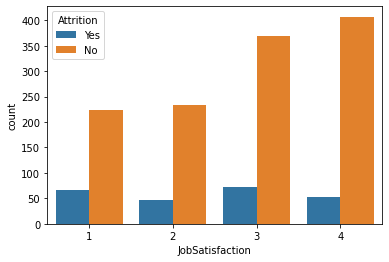

In [15]:
#lets chcek the attrition ratio based on job satisfaction
sns.countplot(x="JobSatisfaction",data=df,hue="Attrition")
plt.show()

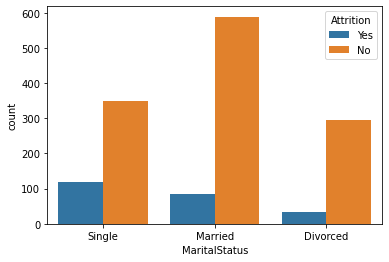

In [16]:
#Lets chcek the attrition ratio in MaritalStatus
sns.countplot(x="MaritalStatus",data=df,hue="Attrition")
plt.show()

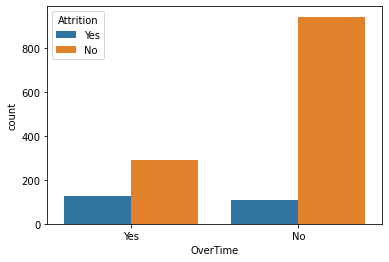

In [17]:
#Lets compare check the proportion of attrition based on overtime
sns.countplot(x="OverTime",data=df,hue="Attrition")
plt.show()

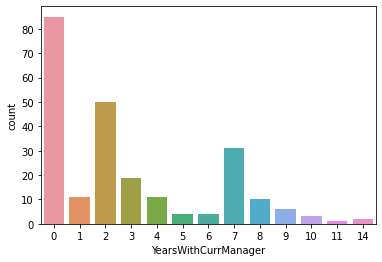

In [18]:
sns.countplot(x="YearsWithCurrManager",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

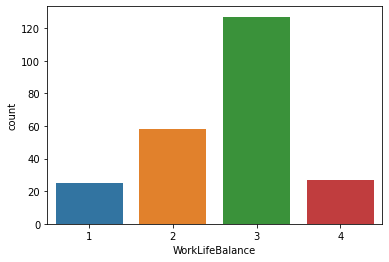

In [19]:
#lets chcek the work life balance with attrition
sns.countplot(x="WorkLifeBalance",data=df.loc[df["Attrition"]=="Yes"])
plt.show()

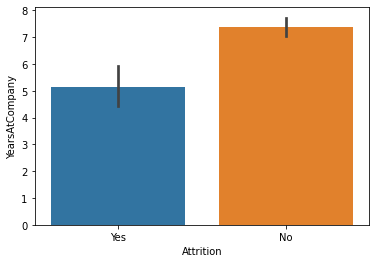

In [20]:
# average working years of the employee who left and wh stayed
sns.barplot(x="Attrition",y="YearsAtCompany",data=df)
plt.show()

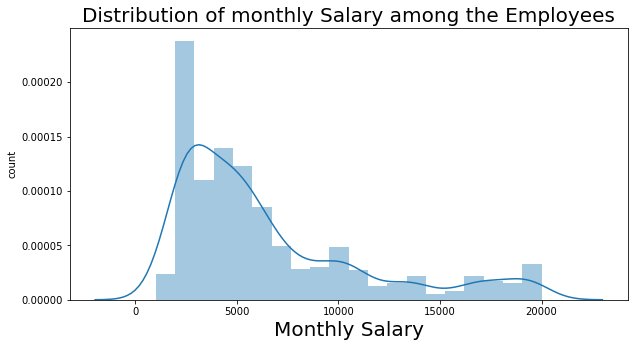

In [21]:
# checking the distribution of monthly salary of the Employees

plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(df['MonthlyIncome'])
plt.title('Distribution of monthly Salary among the Employees', fontsize = 20)
plt.xlabel('Monthly Salary', fontsize = 20)
plt.ylabel('count')
plt.show()

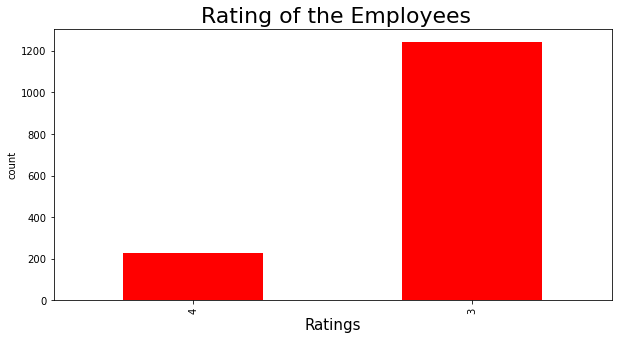

In [22]:
# checking the performance rating of employees
df['PerformanceRating'].value_counts().sort_values().plot.bar(color = 'red', figsize = (10, 5))
plt.title(' Rating of the Employees', fontsize = 22)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('count')
plt.show()

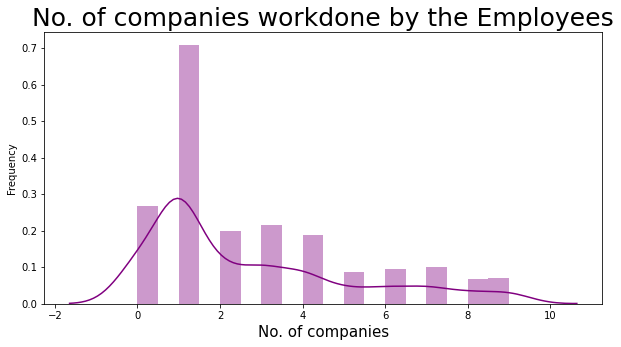

In [23]:
# checking the workdone in no. of companies done by the employees

plt.rcParams['figure.figsize'] = (10, 5)
sns.distplot(df['NumCompaniesWorked'], color = 'purple')
plt.title('No. of companies workdone by the Employees', fontsize = 25)
plt.xlabel('No. of companies', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

In [24]:
# encoding all to numeric values

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [25]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLast

# EDA

In [26]:
#checking correlation
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


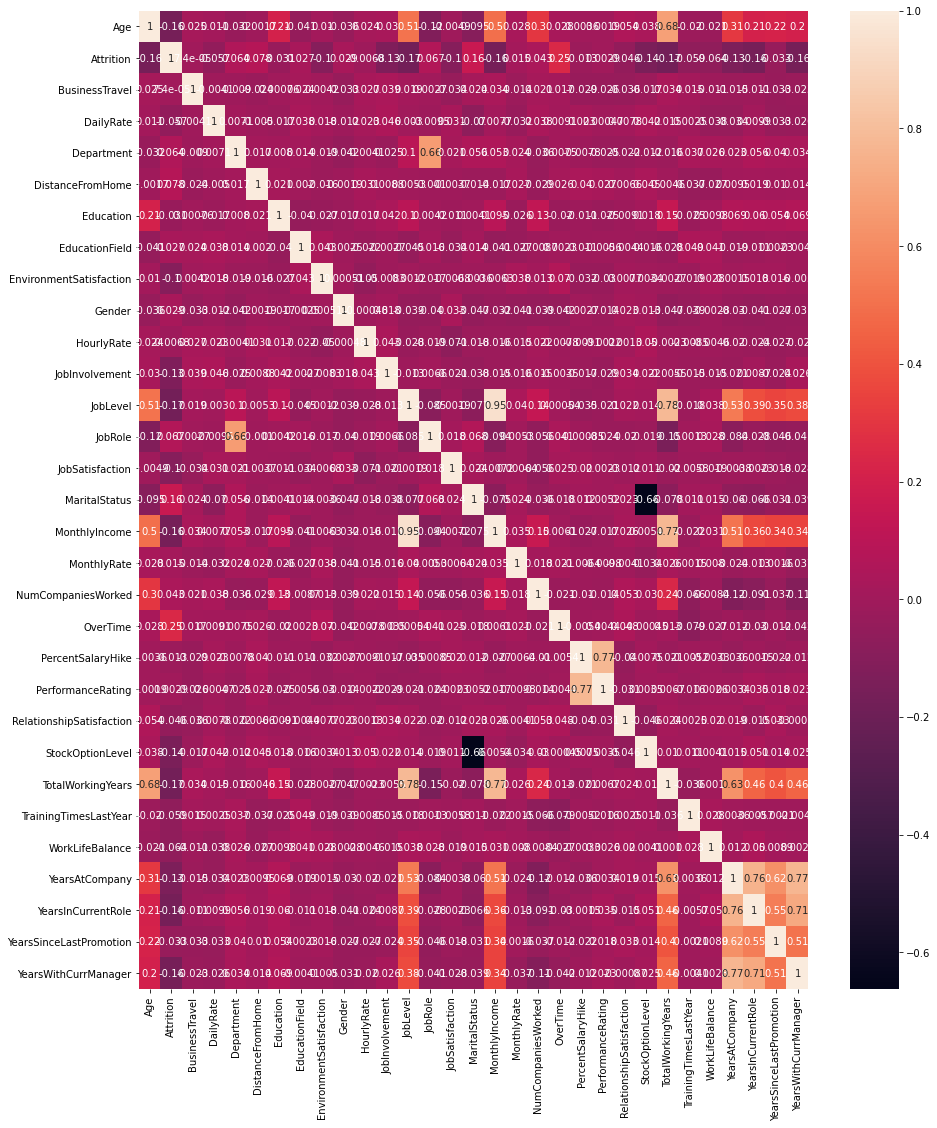

In [27]:
#heatmap correlation

import seaborn as sns
corr_hmap=df.corr()
plt.figure(figsize=(15,18))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Age                            AxesSubplot(0.125,0.772143;0.110714x0.107857)
Attrition                   AxesSubplot(0.257857,0.772143;0.110714x0.107857)
BusinessTravel              AxesSubplot(0.390714,0.772143;0.110714x0.107857)
DailyRate                   AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Department                  AxesSubplot(0.656429,0.772143;0.110714x0.107857)
DistanceFromHome            AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Education                      AxesSubplot(0.125,0.642714;0.110714x0.107857)
EducationField              AxesSubplot(0.257857,0.642714;0.110714x0.107857)
EnvironmentSatisfaction     AxesSubplot(0.390714,0.642714;0.110714x0.107857)
Gender                      AxesSubplot(0.523571,0.642714;0.110714x0.107857)
HourlyRate                  AxesSubplot(0.656429,0.642714;0.110714x0.107857)
JobInvolvement              AxesSubplot(0.789286,0.642714;0.110714x0.107857)
JobLevel                       AxesSubplot(0.125,0.513286;0.110714x0.107857)

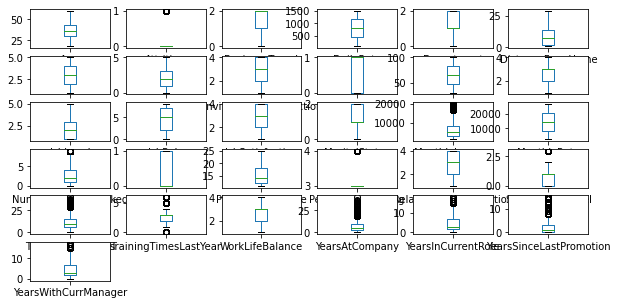

In [28]:
# checking outliers
df.plot.box(subplots=True,layout=(6,6))

In [29]:
# removing outliers

from scipy.stats import zscore

z=np.abs(zscore(df))
print(df.shape)
df=df.loc[(z<3).all(axis=1)]
print(df.shape)

(1470, 31)
(1387, 31)


In [30]:
#splitting the data for training and test

df_x=df.drop(columns=['Attrition'])
y=df['Attrition']

In [31]:
#checking skewness
df_x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

In [32]:
# treating skewness using log

for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [33]:
#Lets again check the skewness
print("Total count of numeric features: ",len(df_x.skew()))
print("count of features which are significantly skewed: ",len(df_x.skew().loc[abs(df_x.skew())>0.55]))

Total count of numeric features:  30
count of features which are significantly skewed:  16


# Applying PCA

In [34]:
# applying pca to minimise no. of columns to 10
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
x=pca.fit_transform(df_x)

In [35]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
max_score=0

for r_state in range(37,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    score=accuracy_score(y_test,pred)
    if score>max_score:
        max_score=score
        final_r_state=r_state
print("Maximimum Accuracy Score is",max_score,'at',final_r_state)

Maximimum Accuracy Score is 0.9052287581699346 at 73


# Comparing accuracy by using various models 

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=73)

In [40]:
model=[LogisticRegression(),GaussianNB(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 

Accuracy Score of LogisticRegression() is:
0.9052287581699346
[[254   6]
 [ 23  23]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       260
           1       0.79      0.50      0.61        46

    accuracy                           0.91       306
   macro avg       0.86      0.74      0.78       306
weighted avg       0.90      0.91      0.90       306



Accuracy Score of GaussianNB() is:
0.7679738562091504
[[200  60]
 [ 11  35]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       260
           1       0.37      0.76      0.50        46

    accuracy                           0.77       306
   macro avg       0.66      0.77      0.67       306
weighted avg       0.86      0.77      0.80       306



Accuracy Score of SVC() is:
0.8823529411764706
[[255   5]
 [ 31  15]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       260
 

# Using some ensemble techniques to boost up the score

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier()]


for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy Score of",m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n') 


Accuracy Score of RandomForestClassifier() is:
0.8790849673202614
[[256   4]
 [ 33  13]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       260
           1       0.76      0.28      0.41        46

    accuracy                           0.88       306
   macro avg       0.83      0.63      0.67       306
weighted avg       0.87      0.88      0.85       306



Accuracy Score of AdaBoostClassifier() is:
0.8921568627450981
[[250  10]
 [ 23  23]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       260
           1       0.70      0.50      0.58        46

    accuracy                           0.89       306
   macro avg       0.81      0.73      0.76       306
weighted avg       0.88      0.89      0.88       306



Accuracy Score of GradientBoostingClassifier() is:
0.8954248366013072
[[253   7]
 [ 25  21]]
              precision    recall  f1-score   support

           0       0

# Using Adaboost with svc after finding best parametrs using gridsearchcv

In [43]:
# checking best parmeter for svc using grid search
from sklearn.model_selection import GridSearchCV
sv=SVC()
estimator={'kernel':['rbf','poly','linear']}
clf=GridSearchCV(sv,estimator)
clf.fit(x,y)
clf.best_params_

{'kernel': 'linear'}

In [44]:
# checking best parmeter for adaboost using grid search
from sklearn.model_selection import GridSearchCV
ad=AdaBoostClassifier()
estimator={'n_estimators':[50,100,150]}
clf=GridSearchCV(ad,estimator)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 100}

In [45]:
# checking results of Adaboost with SVC
svc=SVC(probability=True,kernel='linear')

ad=AdaBoostClassifier(n_estimators=100,base_estimator=svc) 
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))


0.8496732026143791
[[260   0]
 [ 46   0]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       260
           1       0.00      0.00      0.00        46

    accuracy                           0.85       306
   macro avg       0.42      0.50      0.46       306
weighted avg       0.72      0.85      0.78       306



# Best Model

In [46]:
# so we get the best result by using model logistic regression
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Accuracy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))
print('classification report:',classification_report(y_test,pred))

Accuracy score: 0.9052287581699346
confusion matrix: [[254   6]
 [ 23  23]]
classification report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95       260
           1       0.79      0.50      0.61        46

    accuracy                           0.91       306
   macro avg       0.86      0.74      0.78       306
weighted avg       0.90      0.91      0.90       306



# Cross Validation

In [47]:
# cross validation

from sklearn.model_selection import cross_val_score

scores=cross_val_score(lg,x,y,cv=5)
print(scores)
print(scores.mean(),scores.std())

[0.88129496 0.86690647 0.85559567 0.87364621 0.8700361 ]
0.8694958834376543 0.008445784430054174


# AUC ROC CURVE

In [48]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [49]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

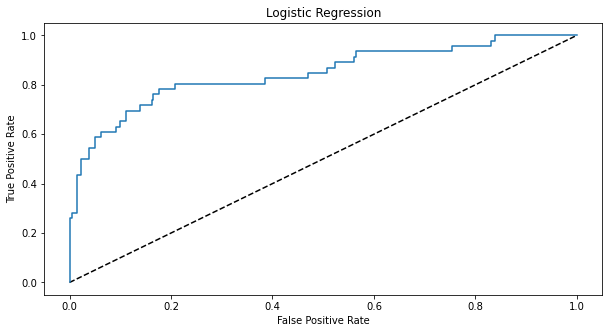

In [50]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression')
plt.show()

In [51]:
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.7384615384615384


# Saving the Model

In [52]:
# saving the model

import joblib
joblib.dump(lg,'lgfile_hrAnalytics.obj') 

['lgfile_hrAnalytics.obj']